## 2. Bike Sharing: Predicción de Demanda Horaria

El objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington, en función de la hora del día y otras variables descritas más abajo.

### a) Carga de datos de entrenamiento y de prueba

In [42]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print(df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
print "\n"
df.info()


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

Se generó un dataframe con la ayuda de *pandas*, en donde se muestran los datos (de entrenamiento y prueba) estadísticos de cada variable involucrada. Dichas variables son:

- **season: ** números enteros cuyos valores son 4, donde cada uno de ellos corresponde a una estación del año.
  * 1 = spring (primavera)
  * 2 = summer (verano)
  * 3 = fall (otoño) 
  * 4 = winter (invierno)


- **holiday: ** variable booleana que indica si es un día festivo o no.
- **workingday: ** variable booleana que indica si no es fin de semana o festivo, o lo es.
- **weather: ** número entero del 1 al 4 que describa el clima del día.
  * 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.


- **temp: ** variable flotante que indica la temperatura en grados Celcius (°C).
- **atemp: ** variable flotante que indica la temperatura *al tacto*.
- **humidity: ** variable entera que indica la humedad relativa del día.
- **windspeed: ** variable flotante indica la velocidad del viento del día.
- **casual: ** variable entera que indica el número de rentas de usuarios **no** registrados
- **registered: ** variable entera que indica el número de rentas de usuarios registrados
- **count: ** variable entera que indica el número total de rentas de bicicletas.

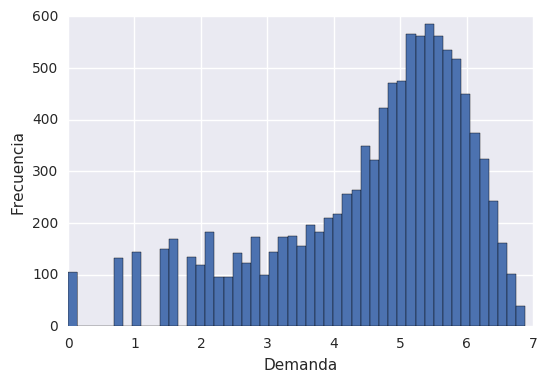

In [43]:
#Histograma de variables.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
variable = 'count'
plt.hist(np.log(df[variable]), bins = 50)
# plt.title(variable)
plt.xlabel("Demanda")
plt.ylabel("Frecuencia")
plt.show()

### b) Entrenamiento de un árbol de regresión

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


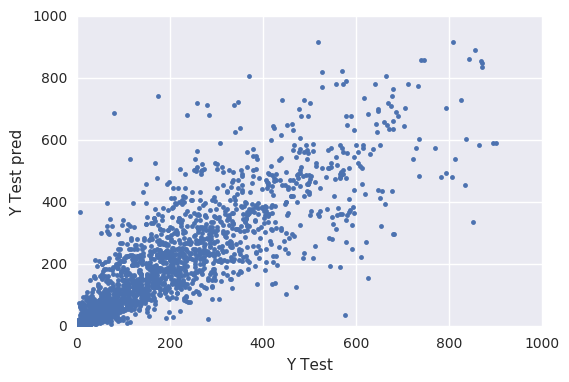

In [44]:
from sklearn.tree import DecisionTreeRegressor as Tree

def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))

Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL TEST =%f"%kagg_test

plt.plot(Y_test,Y_pred_test,'.')
plt.xlabel('Y Test')
plt.ylabel('Y Test pred')
plt.show()

Utilizando el árbol de regresión ajustándolo con los datos de entrenamiento, se obtiene un puntaje sobre los datos de prueba y su valor corresponde a 0.703388, lo que significa que el modelo del árbol de regresión se encuentra muy lejos del top-100 del *leaderboard* final ya que el valor es superior a 0.37748.

Luego se procedió a evaluar los datos de entrenamiento y de prueba a partir de la función *eval_bikemodel()* que es un modelo predictivo que utiliza la siguiente ecuación:

$$E_{bikes}(y,\widehat{y})=\frac{1}{n}\sum_{i}(\ln{(y_{i}+1)}-\ln{(\widehat{y}_{i}+1)})^{2}$$

Con esto se han obtenido los siguientes puntajes para los datos predictivos de entrenamiento y de prueba:

* Puntaje entrenamiento: 0.028516
* Puntaje prueba: 0.574239

Por lo tanto, utilizando el modelo predictivo para el concurso de Kaggle, con los datos predictivos de entrenamiento cumple con el objetivo de estar dentro del top-100 del *leaderboard* final por su puntaje muy alto (0.37748). Por otro lado, con los datos predictivos de prueba se obtuvo un puntaje que no cumple con el objetivo y se encuentra lejos del dicho top-100. Finalmente el modelo predictivo resulta más eficiente utilizando los datos de entrenamiento.

Del gráfico se puede concluir que los valores predictores están cerca de los valores reales entre 0 y 400, pero superior a 400 el comportamiento no se puede predecir con claridad, ya que algunos están muy dispersos al valor real correspondiente.

### c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo.

Kagg eval validation score min:
(10, 0.47627358457599589)


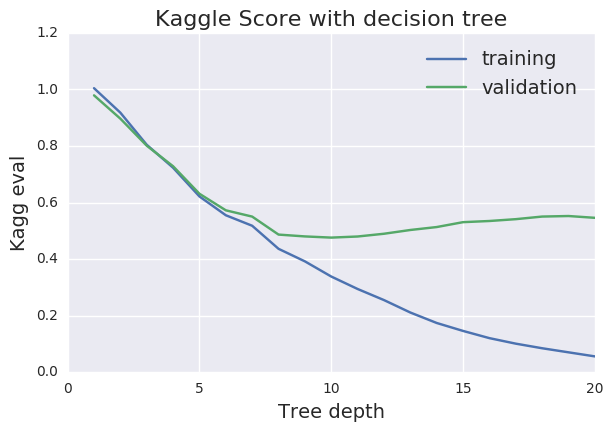

In [45]:
score_depth = {'training':[], 'validation':[]}
for i in range(1,21):
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_val = model.predict(X_val)
    kagg_train = eval_bikemodel(Y_pred_train, Y_train)
    kagg_val = eval_bikemodel(Y_pred_val, Y_val)
    score_depth['training'].append((i, kagg_train))
    score_depth['validation'].append((i, kagg_val))
    # print "KAGG EVAL VAL:{} - depth: {}".format(kagg_val, i)

print "Kagg eval validation score min:"
print min(score_depth['validation'], key = lambda t: t[1])

fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
fig.tight_layout()
ax.plot(*zip(*score_depth['training']), label='training')
ax.plot(*zip(*score_depth['validation']), label='validation')
ax.set_xlabel('Tree depth', size=14)
ax.set_ylabel('Kagg eval', size=14)
ax.set_title('Kaggle Score with decision tree', size=16)
ax.legend(loc="upper right", prop={'size':14}) 

La modificación realizada es la siguiente: limitar la profundidad máxima del árbol de regresión. Como se puede apreciar en el output, el *score* irá disminuyendo a medida que la profundidad máxima del árbol de regresión, por lo que es conveniente para este caso aumentar la profundidad máxima del árbol. Sin embargo esto es cierto hasta los 10 niveles, donde se alcanza el mínimo, puesto que despues el valor retornado por kagg eval aumenta, probablemente a un overfitting del modelo.

In [46]:
depth, score =  min(score_depth['validation'], key = lambda t: t[1])
model = Tree(random_state=0,max_depth=depth)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
kagg_test = eval_bikemodel(Y_pred_test, Y_test)
print "kaggle eval test: {}".format(kagg_test)

kaggle eval test: 0.516396347328


Arriba se observa que optimizando el número de niveles del árbol, se mejora el kaggle score de 0.57 aprox. a un poco más de 0.51.

### d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación utilizada para aprender desde los datos.

In [54]:
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

Se agregan las columnas día de la semana, mes y año.

In [55]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month','year']]
Ydf = df.ix[:,'count']

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

Se entrena el árbol de clasificación con los nuevos datos.

In [56]:
model = Tree(random_state=0, max_depth=10)
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.269763
KAGG EVAL VAL =0.406954
KAGG EVAL TEST =0.421748


Al modificar sobre la representación utilizando los datos de la fecha (día de la semana, mes, año), se puede observar que el *score* de los datos predictivos de prueba ha mejorado, lo que significa que sube una cierta cantidad de posiciones en el ranking. 

Ahora bien, se realiza una transformación sobre la variable respuesta. En este caso, se aplica la función raíz cuadrada y se vuelve a entrenar el árbol con esas modificaciones.

In [57]:
Ydf = np.power(df.ix[:,'count'], 1.0/2)
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0, max_depth=10)
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.275100
KAGG EVAL VAL =0.404524
KAGG EVAL TEST =0.446547


Al aplicar la transformación de la raíz cuadrada, se observa una ligera mejora con respecto a los resultados obtenidos al sólo agregar las nuevas variables predictoras. El score de validación y test están por debajo del 0.45, por lo que se podría decir que ya se está dentro del top-1000. 

### e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones que haya descubierto hasta este punto.

In [32]:
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month', 'year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday', 'month', 'year'])
Ydf = np.power(df.ix[:,'count'], 1.0/2)


X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

KAGG EVAL TRAIN =0.337437
KAGG EVAL VAL =0.367843
KAGG EVAL TEST =0.397050


Los resultados mejoraron en no menor medida, casi a un 0.35 en el set de validación. El de pruebas quedó en un poco menos de 0.4. En ese sentido, la SVM de regresión tuvo un mejor rendimiento que el árbol de clasificación, incluso sin modificar los hiperparámetros predeterminados.

### f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la máquina

Model: rbf - C: 0.01 - kagg eval train: 1.39351166761 - kagg eval val: 1.36752136652
Model: rbf - C: 0.0193069772888 - kagg eval train: 1.31947150757 - kagg eval val: 1.29435003167
Model: rbf - C: 0.0372759372031 - kagg eval train: 1.19274946743 - kagg eval val: 1.16860485131
Model: rbf - C: 0.0719685673001 - kagg eval train: 0.974160582851 - kagg eval val: 0.954333606623
Model: rbf - C: 0.138949549437 - kagg eval train: 0.726710996674 - kagg eval val: 0.709323181251
Model: rbf - C: 0.268269579528 - kagg eval train: 0.562707821277 - kagg eval val: 0.55417538139
Model: rbf - C: 0.517947467923 - kagg eval train: 0.443055570606 - kagg eval val: 0.449173485617
Model: rbf - C: 1.0 - kagg eval train: 0.337437013223 - kagg eval val: 0.367842553107
Model: rbf - C: 1.93069772888 - kagg eval train: 0.268286624097 - kagg eval val: 0.334941379334
Model: rbf - C: 3.72759372031 - kagg eval train: 0.226651877061 - kagg eval val: 0.333070409058
Model: rbf - C: 7.19685673001 - kagg eval train: 0.188702

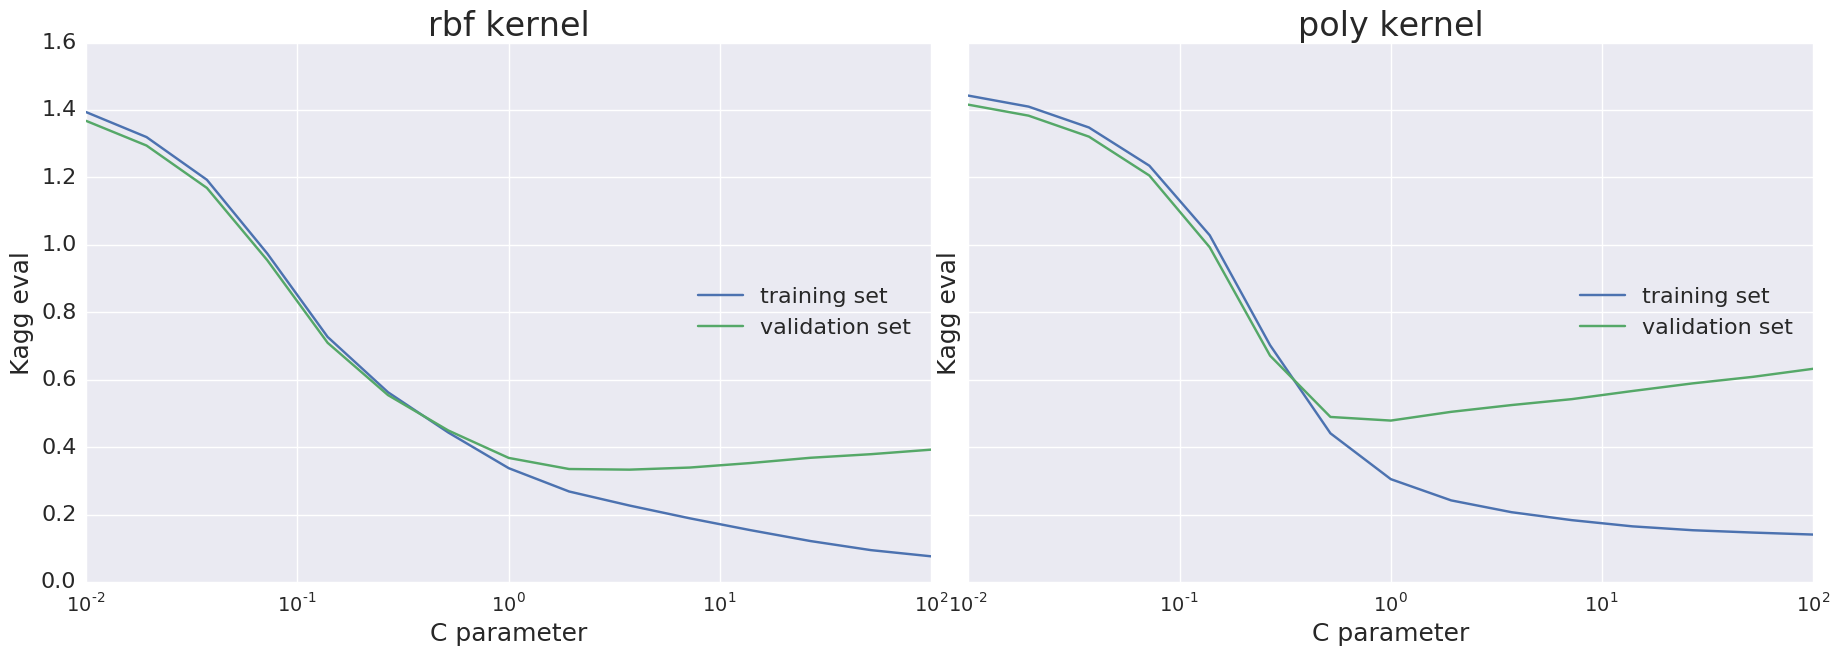

In [65]:
kernels = ['rbf', 'poly']
C = np.logspace(-2, 2, 15)
fig, axs = plt.subplots(ncols=2, figsize=(18, 6), sharey=True)
fig.tight_layout()
for i, kernel in enumerate(kernels):
    datapoints = {'training':[], 'validation':[]}
    for c in C:
        model = SVR(kernel=kernel, C=c)
        model.fit(X_train, Y_train)
        Y_pred_train = model.predict(X_train)
        Y_pred_val = model.predict(X_val)
        tr_score = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
        val_score = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
        datapoints['training'].append((c, tr_score))
        datapoints['validation'].append((c, val_score))
        print "Model: {} - C: {} - kagg eval train: {} - kagg eval val: {}".format(kernel, c, tr_score, val_score)
    axs[i].plot(*zip(*datapoints['training']), label='training set')
    axs[i].plot(*zip(*datapoints['validation']), label='validation set')
    axs[i].set_xlabel('C parameter', size=18)
    axs[i].set_ylabel('Kagg eval', size=18)
    axs[i].legend(loc="center right", prop={'size':16})  
    axs[i].set_title(kernel + ' kernel', size=24)
    axs[i].yaxis.set_tick_params(labelsize=16)
    axs[i].xaxis.set_tick_params(labelsize=14)
    axs[i].set_xscale('log')

Se observa que la svm con kernel rbf tiene un rendimiento mejor que la con kernel polinomial (grado 3). Con el primero se alcanza un mínimo de 0.3330 y con el segundo 0.4786. Para rbf, el C es óptimo es 3.72 y para polinomial es igual a 1. Pasando esos puntos, se visualiza un overfitting de los datos. Finalmente y comparando con el ítem anterior, sintonizar el parámetro C ayudó en cierta medida para mejorar el Kaggle eval score sobre el validation set. 

In [33]:
model = SVR(kernel='rbf', C=3.72759372031)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "Kernel rbf - kagg eval test: {}".format(kagg_test)

Kernel rbf - kagg eval test: 0.372193579857


In [34]:
model = SVR(kernel='poly', C=1)
model.fit(X_train, Y_train)
Y_pred_test = model.predict(X_test)
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "Kernel poly - kagg eval test: {}".format(kagg_test)

Kernel poly - kagg eval test: 0.527343835546


Se logra mejorar el rendimiento optimizando el parámetro C para el kernel rbf. No ocurre lo mismo con el polinomial, cuyo desempeño es bastante malo.

### g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada.

#### Árboles

Carga de los datos

In [35]:
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month','year']]
Ydf = np.power(df.ix[:,'count'], 1.0/2)

X_train = Xdf[0:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:nval].values
Y_test = Ydf[nval:].values

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


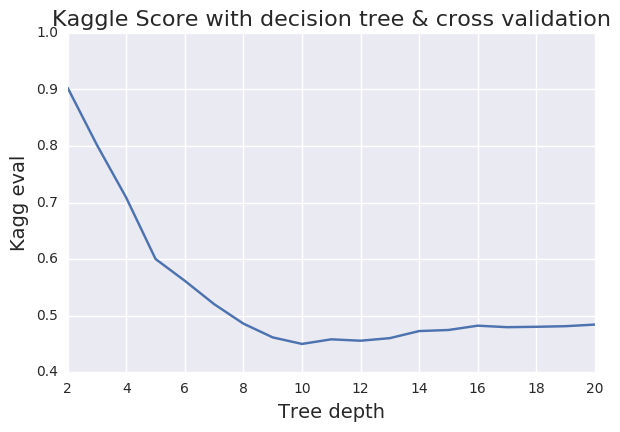

In [37]:
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(X_train), 10)
depth_score = []
for i in range(2, 21):
    score_cv = 0
    for k, (train, val) in enumerate(k_fold):
        model = Tree(random_state=0, max_depth=i)
        model.fit(X_train[train], Y_train[train])
        Ypred_val = model.predict(X_train[val])
        Ytrue_val = Y_train[val]
        score_fold = eval_bikemodel(np.power(Ypred_val, 2), np.power(Ytrue_val, 2))
        score_cv += score_fold
    score_cv = score_cv / 10
    depth_score.append((i, score_cv))

fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
fig.tight_layout()
ax.plot(*zip(*depth_score))
ax.set_xlabel('Tree depth', size=14)
ax.set_ylabel('Kagg eval', size=14)
ax.set_title('Kaggle Score with decision tree & cross validation', size=16)

In [58]:
print min(depth_score, key = lambda t: t[1])

(10, 0.45021676242902098)


Utilizando cross validation se produjeron resultados ligeramente mejores que cuando se utiliza un validation set autónomo. El mejor resultado se alcanza con un árbol de profundidad máxima de 10 niveles. Los resultados probablemente se deban a la utilizan de una mayor cantidad de datos de entrenamiento, permitiendo una mayor generalización del modelo. Probando en el dataset de test:

In [38]:
depth, score = min(depth_score, key = lambda t: t[1])
model = Tree(random_state=0, max_depth=depth)
model.fit(X_train, Y_train)
Ypred_test = model.predict(X_test)
kagg_test = eval_bikemodel(np.power(Ypred_test, 2), np.power(Y_test, 2))
print "Kaggle eval test: {}".format(kagg_test)

Kaggle eval test: 0.418975973457


#### SVM

Las pruebas se realizan con el kernel rbf, el cual fue el que mostró los mejores resultados, vistos en el ítem (f). A continuación se define la carga de datos para trabajar con SVM.

In [60]:
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month', 'year']]
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday', 'month', 'year'])
Ydf = np.power(df.ix[:,'count'], 1.0/2)

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

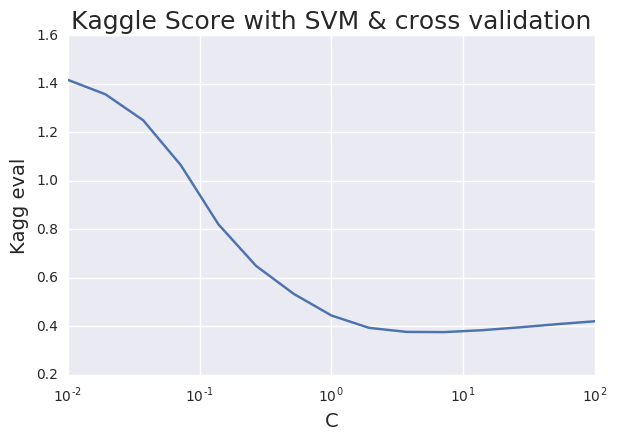

In [61]:
from sklearn import cross_validation
from sklearn.svm import SVR
C = np.logspace(-2, 2, 15)
k_fold = cross_validation.KFold(len(X_train), 10)
C_score = []
for c in C:
    score_cv = 0
    for k, (train, val) in enumerate(k_fold):
        model = SVR(C=c)
        model.fit(X_train[train], Y_train[train])
        Ypred_val = model.predict(X_train[val])
        Ytrue_val = Y_train[val]
        score_fold = eval_bikemodel(np.power(Ypred_val, 2), np.power(Ytrue_val, 2))
        score_cv += score_fold
    score_cv = score_cv / 10
    C_score.append((c, score_cv))

fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
fig.tight_layout()
ax.plot(*zip(*C_score))
ax.set_xlabel('C', size=14)
ax.set_ylabel('Kagg eval', size=14)
ax.set_title('Kaggle Score with SVM & cross validation', size=18)
ax.set_xscale('log')

In [62]:
print min(C_score, key = lambda t: t[1])

(7.1968567300115138, 0.37604774810557007)


En este caso, el parámetro C que corresponde al mejor Kaggle score es igual a 7.2. El rendimiento es ligeramente menor que el obtenido al utilizar un validation set autónomo. Este resultado se prueba sobre el testing set:

In [63]:
C, score = min(C_score, key = lambda t: t[1])
model = SVR(C=C)
model.fit(X_train, Y_train)
Ypred_test = model.predict(X_test)
kagg_test = eval_bikemodel(np.power(Ypred_test, 2), np.power(Y_test, 2))
print "Kaggle eval test: {}".format(kagg_test)

Kaggle eval test: 0.379743456634


No se observa un gran diferencia entre el método utilizando un validation set autónomo que con cross validation. Con este último tiende a empeorar un poco.

### h) Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda total de bicicletas.

In [21]:
from sklearn.ensemble import BaggingRegressor
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month','year']]
Ydf = np.power(df.ix[:,'count'], 1.0/2)

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values


model = BaggingRegressor(n_estimators=2, random_state=0)
model.fit(X_train, Y_train)
score_test = model.score(X_test,Y_test)
print "Demanda total:"

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test
print "\n"

Ydf = np.power(df.ix[:,'registered'], 1.0/2) #demanda registrada
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values
model.fit(X_train, Y_train)
score_test = model.score(X_test,Y_test)
print "Demanda registrada:"

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test
print "\n"

Ydf = np.power(df.ix[:,'casual'], 1.0/2) #demanda casual
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values
model.fit(X_train, Y_train)
score_test = model.score(X_test,Y_test)
print "Demanda casual"

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val
print "KAGG EVAL TEST =%f"%kagg_test

Demanda total:
KAGG EVAL TRAIN =0.206983
KAGG EVAL VAL =0.397082
KAGG EVAL TEST =0.413411


Demanda registrada:
KAGG EVAL TRAIN =0.199041
KAGG EVAL VAL =0.377027
KAGG EVAL TEST =0.402668


Demanda casual
KAGG EVAL TRAIN =0.326534
KAGG EVAL VAL =0.587059
KAGG EVAL TEST =0.647068


En los 3 casos (demanda total, demanda registrada y demanda casual) se ha utilizado un ensamblado con 2 máquinas de aprendizaje (n_estimators) que utiliza el método de **Bagging**. Resumiendo los resultados obtenidos en tales casos, se obtiene un mejor *score* en la demanda registrada, lo que significa que los usuarios que están registrados en el *Bike Sharing* tienen un comportamiento más predecible, por el hecho de ser usuarios más frecuentes en el sentido de que el ciclismo es una actividad más establecida en ellos, mientras que para los usuarios casuales, la realización de la actividad es más dispersa, no mostrando un patrón que sea más fácil de predecir.

### i) Evalíe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir la demanda total de bicicletas.

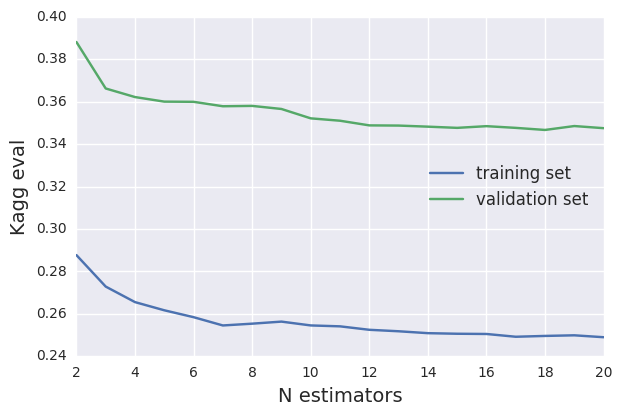

In [22]:
from sklearn.ensemble import RandomForestRegressor
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
df['month'] = pd.to_datetime(df['datetime']).dt.month
df['month'] = pd.to_numeric(df['month'])
df['year'] = pd.to_datetime(df['datetime']).dt.year
df['year'] = pd.to_numeric(df['year'])
Xdf = df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday', 'month','year']]
Ydf = np.power(df.ix[:,'count'], 1.0/2)

X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values


data = {'training':[], 'validation':[]}
for n_maquinas in range(2,21):
    model = RandomForestRegressor(n_estimators=n_maquinas,max_depth=10,random_state=0)
    model.fit(X_train, Y_train)

    Y_pred_train = model.predict(X_train)
    Y_pred_val = model.predict(X_val)
    Y_pred_test = model.predict(X_test)
    
    kagg_train = eval_bikemodel(np.power(Y_pred_train, 2), np.power(Y_train, 2))
    kagg_val = eval_bikemodel(np.power(Y_pred_val, 2), np.power(Y_val, 2))
    kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
    
    data['training'].append((n_maquinas, kagg_train))
    data['validation'].append((n_maquinas, kagg_val))

fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
fig.tight_layout()
ax.plot(*zip(*data['training']), label='training set')
ax.plot(*zip(*data['validation']), label='validation set')
ax.set_xlabel('N estimators', size=14)
ax.set_ylabel('Kagg eval', size=14)
ax.legend(loc="center right", prop={'size':12})  

In [42]:
print min(data['training'], key = lambda t: t[1])
print min(data['validation'], key = lambda t: t[1])

(20, 0.24900894816875824)
(18, 0.34670746647971029)


Se ha realizado distintos modelos de ensamblado usando la técnica **Random Forest** con una cantidad variada de máquinas de aprendizaje, en este caso, de 2 a 20 máquinas. El *score* de entrenamiento y de validación van mejorando lentamente hasta poder converger a cierto valor, que en este caso es aproximadamente de 0.249 y 0.346 respectivamente.

In [23]:
model = RandomForestRegressor(n_estimators=18,max_depth=10,random_state=0)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=18, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [24]:
Y_pred_test = model.predict(X_test)
kagg_test = eval_bikemodel(np.power(Y_pred_test, 2), np.power(Y_test, 2))
print "Kaggle eval test: {}".format(kagg_test)

0.384006869625


La diversidad entregada por Random Forest, por el hecho de remuestrar tanto los ejemplos de entrenamiento como los features considerados, hace que se obtengan mejores resultados que usando un sólo árbol regresor.